## Chapter 7
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
%matplotlib inline

### Figure 7.3 and 7.6 Left
#### Data Source: https://www.statcrunch.com/app/index.php?dataid=1406047

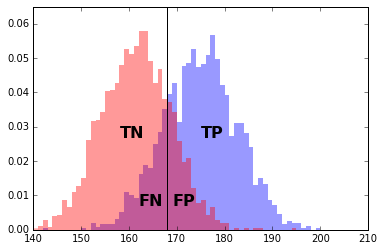

In [2]:
path = "/home/yeseul/practice-notebook/weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
men = data[data["Gender"]==1]
women = data[data["Gender"]==0]

bsize = 75
n, bins, patches = plt.hist(men["Height"], bins=range(140,max(men["Height"]),1), normed=True, \
                            color="blue",  alpha=0.4, linewidth=0)

plt.hist(women["Height"], bins=range(140,max(men["Height"]),1), normed=True, \
         color="red", alpha=0.4, linewidth=0)

plt.ylim(0,0.065)
plt.vlines(168, 0, 0.08)

plt.text(158, 0.027, "TN", fontsize=16, fontweight="bold")
plt.text(162, 0.007, "FN", fontsize=16, fontweight="bold")
plt.text(169, 0.007, "FP", fontsize=16, fontweight="bold")
plt.text(175, 0.027, "TP", fontsize=16, fontweight="bold")

### For Figure 7.6, need data that's not normalized.

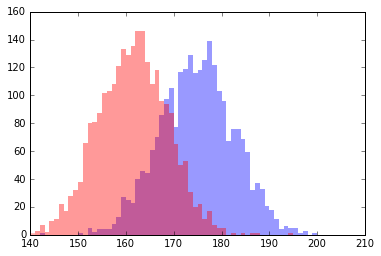

In [3]:
nM, binM, patchesM = plt.hist(men["Height"], bins=range(140,max(men["Height"]),1), \
                            color="blue",  alpha=0.4, linewidth=0)

nW, binW, patchesW = plt.hist(women["Height"], bins=range(140,max(men["Height"]),1), \
         color="red", alpha=0.4, linewidth=0)

### Figure 7.6 Right

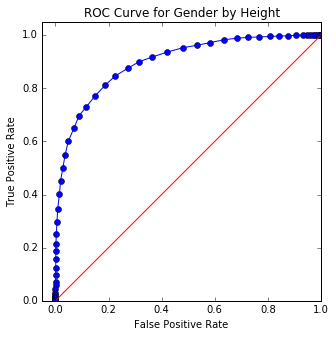

In [4]:
tpr = []
fpr = []
#total num people
totalW = len(women["Height"])
totalM = len(men["Height"])

#total num people checked.
sumW = 0
sumM = 0
total = len(data["Height"])

for i in range(len(binM)-1):
    tprate = (totalM-sumM)/float(totalM)
    fprate = (totalW-sumW)/float(totalW)
    tpr.append(tprate)
    fpr.append(fprate)
    sumM += nM[i]
    sumW += nW[i]
    
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, 'bo', fpr, tpr, 'b-')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'r-')

plt.xlim(-0.05, 1)
plt.ylim(0,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gender by Height")